In [61]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [62]:
tickers = ['SSL']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1',)['Close']

In [63]:
#log returns
log_returns = np.log(1 + data.pct_change())

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [64]:
#risk free rate (US 10-yr Bonds)
r = 0.025
stdev = float(log_returns.std() * 250 ** 0.5)

T = 1.0 
t_intervals = 100
delta_t = T / t_intervals 

iterations = 1000 

In [65]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

In [66]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

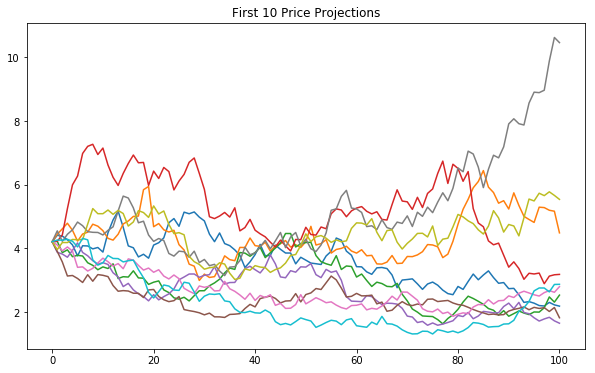

In [67]:
plt.figure(figsize=(10, 6))
plt.title("First 10 Price Projections")
plt.plot(S[:, :10]);

## Average Price

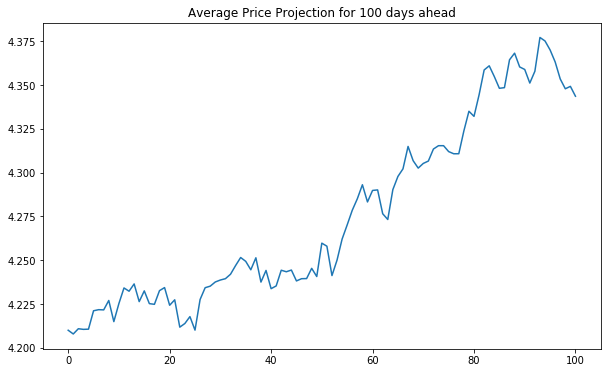

In [68]:
average =[i.mean() for i in S]
plt.figure(figsize=(10,6))
plt.title("Average Price Projection for 100 days ahead")
plt.plot(average);

In [69]:
print("Projected Return: %.2f%%"%((average[-1]-average[0])/average[0]*100))

Projected Return: 3.18%
